## Credit Card Customers - Predicting customer churn

## Objective
The objective here is to predict customer churn based on the customer information.

## Dataset Descriptions
The dataset is obtained from Kaggle. There are total of 10127 rows and 21 columns.
<br> <br>
Data fields:
- CLIENTNUM - Unique client identifier for customer
- Attrition_Flag - The target variable
- Customer_Age - The customer age
- Gender - The customer gender
- Dependent_count - Number of dependants of customer
- Education_Level - The education level of customer
- Marital_Status - The marital status of customer
- Income_Category - The income category of customer
- Card_Category - The card category of customer
- Months_on_book - The period of relationship of customer with bank
- Total_Relationship_Count - The total number of products held by customer with the bank
- Months_Inactive_12_mon - The number of inactive months in last 12 months
- Contacts_Count_12_mon - The number of contacts in the last 12 months
- Credit_Limit - The credit limit on the credit card of the customer
- Total_Revolving_Bal - The total revolving balance on the credit card of the customer
- Avg_Open_To_Buy - Average open to buy credit line of customer in last 12 months
- Total_Amt_Chng_Q4_Q1 - The change in transaction amount of customer
- Total_Trans_Amt - Total transaction amount of customer in last 12 months
- Total_Trans_Ct - Total transaction count of customer in last 12 months
- Total_Ct_Chng_Q4_Q1 - The change in transaction count of customer
- Avg_Utilization_Ratio - The average card utilization ratio of customer

***

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from scipy.spatial.distance import cdist
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from boruta import BorutaPy
sns.set(rc={'figure.figsize':(11.7,8.27)})

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Read Dataset

In [2]:
df = pd.read_csv("./BankChurners.csv")

## Drop client number column

In [3]:
df = df.drop("CLIENTNUM", axis = 1)

## Characteristic and summary of dataset

In [4]:
df.shape

(10127, 20)

In [5]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


## Show the correlation chart of the dataset

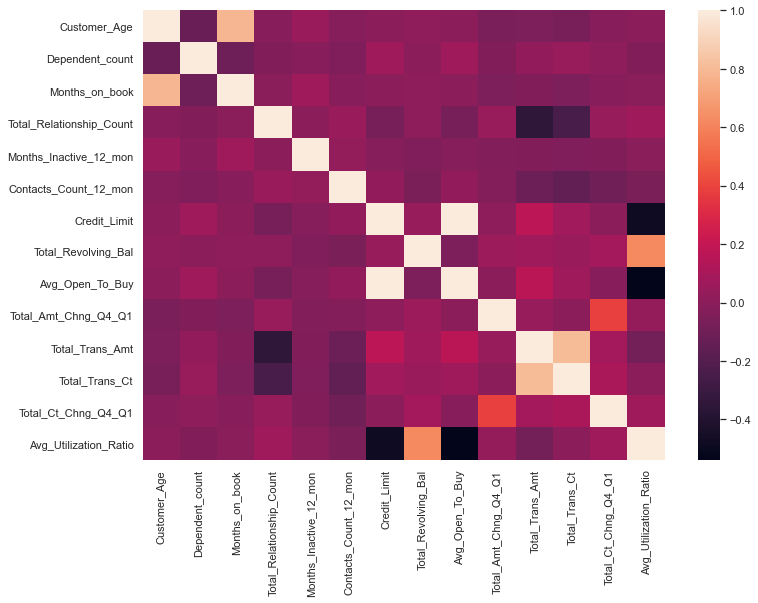

In [6]:
corr = df.corr()
sns.heatmap(corr);

## Data Cleaning

In [7]:
# Change target variable to 0 and 1
df["Attrition_Flag"] = [1 if i == "Attrited Customer" else 0 for i in df["Attrition_Flag"]]

In [8]:
# Check for NA
df.isna().any()

Attrition_Flag              False
Customer_Age                False
Gender                      False
Dependent_count             False
Education_Level             False
Marital_Status              False
Income_Category             False
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Revolving_Bal         False
Avg_Open_To_Buy             False
Total_Amt_Chng_Q4_Q1        False
Total_Trans_Amt             False
Total_Trans_Ct              False
Total_Ct_Chng_Q4_Q1         False
Avg_Utilization_Ratio       False
dtype: bool

## One-hot encoding

In [9]:
oh_df = pd.get_dummies(df.select_dtypes(include = "object"))
df = pd.concat([df.select_dtypes(exclude = "object"), oh_df], axis = 1)

In [10]:
df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,39,5,1,3,12691.0,777,11914.0,...,0,0,1,0,0,0,1,0,0,0
1,0,49,5,44,6,1,2,8256.0,864,7392.0,...,0,0,0,0,1,0,1,0,0,0
2,0,51,3,36,4,1,0,3418.0,0,3418.0,...,0,0,0,1,0,0,1,0,0,0
3,0,40,4,34,3,4,1,3313.0,2517,796.0,...,0,0,0,0,1,0,1,0,0,0
4,0,40,3,21,5,1,0,4716.0,0,4716.0,...,0,0,1,0,0,0,1,0,0,0


## Feature Ranking

In [11]:
# Separate dataframe into X and y
y = df.Attrition_Flag
X = df.drop("Attrition_Flag", axis = 1)

In [12]:
# Setup the classifier for boruta
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)

In [13]:
# Fit the dataframe to the classifier
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [14]:
# Initialize boruta algorithm
boruta = BorutaPy(rf, random_state = 1, verbose = 2)

In [15]:
# Fit the dataframe to boruta
boruta.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	37
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	13
Tentative: 	0
Rejected: 	24


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	13
Tentative: 	0
Rejected: 	24


BorutaPy(alpha=0.05, early_stopping=False,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight=None, criterion='gini',
                                          max_depth=None, max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=1000, n_jobs=None,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7FBEB0460150,
                                          verbose=0, warm_start=False),
         max

In [16]:
# Check the feature ranking
features = pd.DataFrame(data = {
    "Feature": X.columns.tolist(),
    "Average Feature Importance": pd.DataFrame(boruta.importance_history_).iloc[1:].mean(axis = 0).tolist()
})

features = features.sort_values(by = "Average Feature Importance", ascending = False).reset_index(drop = True)

In [17]:
features

,Feature,Average Feature Importance
0,Total_Trans_Amt,0.140069
1,Total_Trans_Ct,0.133057
2,Total_Ct_Chng_Q4_Q1,0.090153
3,Total_Revolving_Bal,0.086594
4,Avg_Utilization_Ratio,0.055686
5,Total_Amt_Chng_Q4_Q1,0.046350
6,Total_Relationship_Count,0.046145
7,Credit_Limit,0.026137
8,Avg_Open_To_Buy,0.024057
9,Contacts_Count_12_mon,0.023787


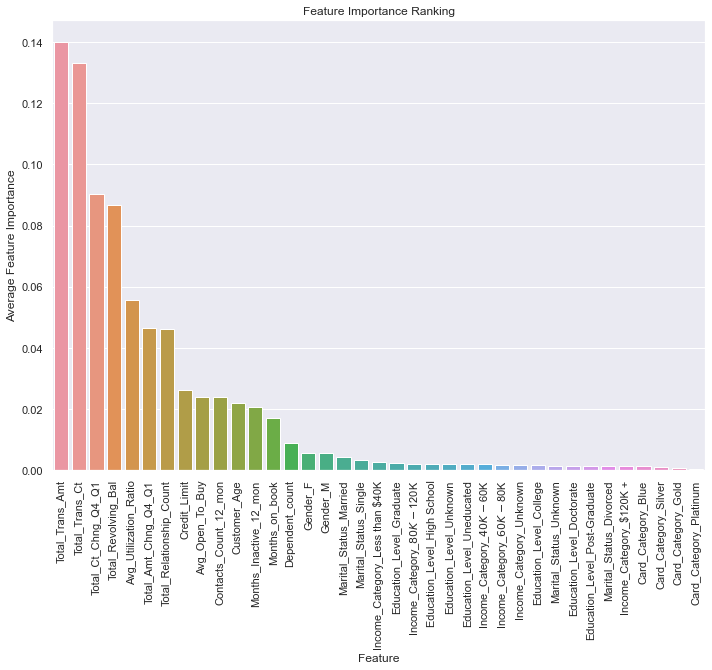

In [18]:
plot = sns.barplot(data = features, x = "Feature", y = "Average Feature Importance").set_title("Feature Importance Ranking")
plt.xticks(rotation=90);

## Data Modeling

In [19]:
# Split dataframe into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

***
## Experiment with Random Forest Algorithm

In [20]:
# Initialize random forest classifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)

In [21]:
# Fit the dataframe to random forest classifier
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [22]:
# Predict on the test data
y_pred = rf.predict(X_test)

In [23]:
# Compare the result
result = pd.DataFrame(list(zip(y_test, y_pred)), columns = ["Actual", "Predicted"])
result.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1


In [24]:
# Calculate the accuracy
accuracy_score(y_test, y_pred)

0.9585389930898321

In [25]:
# Check the confusion matrix
pd.DataFrame(confusion_matrix(y_test, y_pred), 
             index=['true:{}'.format(x) for x in y_test.unique().tolist()], 
             columns=['pred:{}'.format(x) for x in y_test.unique().tolist()])

,pred:0,pred:1
true:0,1676,19
true:1,65,266


In [26]:
# Calculate the recall score
recall_score(y_test, y_pred)

0.8036253776435045

***
## Experiment with XGBoost Algorithm

In [27]:
xgb_class = xgb.XGBClassifier()

In [28]:
xgb_class.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
y_pred = xgb_class.predict(X_test)

In [30]:
accuracy_score(y_test, y_pred)

0.9723593287265548

In [31]:
# Check the confusion matrix
pd.DataFrame(confusion_matrix(y_test, y_pred), 
             index=['true:{}'.format(x) for x in y_test.unique().tolist()], 
             columns=['pred:{}'.format(x) for x in y_test.unique().tolist()])

,pred:0,pred:1
true:0,1673,22
true:1,34,297


In [32]:
# Calculate the recall score
recall_score(y_test, y_pred)

0.8972809667673716

***
## Similarity Measure

In [33]:
# Remove the target variable to prevent from influencing the result of similarity
target_var = df["Attrition_Flag"]
df = df.drop("Attrition_Flag", axis = 1)

In [34]:
# Take first row as the record to be compare with the rest of the dataframe
to_be_compared = df.iloc[[0]].copy()

In [35]:
# Subset the remaining df out
remaining_df = df.iloc[1:].copy()

In [36]:
# Run similarity algorithm
sim_score = cdist(to_be_compared, remaining_df, metric = "Euclidean")
remaining_df["sim_score"] = sim_score[0]

In [37]:
# Map back target variable
to_be_compared["Attrition_Flag"] = target_var[to_be_compared.index]
remaining_df["Attrition_Flag"] = target_var[remaining_df.index]

In [38]:
# Sort the similarity score
remaining_df = remaining_df.sort_values("sim_score")

In [39]:
# Convert similarity score to percentage
remaining_df["sim_score"] = round(100 - ((remaining_df["sim_score"] * 100) / remaining_df["sim_score"].max()), 2)

In [40]:
to_be_compared

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Attrition_Flag
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,0,1,0,0,0,1,0,0,0,0


In [41]:
remaining_df.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,sim_score,Attrition_Flag
88,44,3,31,4,3,1,12756.0,837,11919.0,1.932,...,1,0,0,0,1,0,0,0,99.18,0
1466,53,2,36,1,3,2,12778.0,507,12271.0,0.967,...,0,0,0,0,1,0,0,0,98.69,1
965,49,4,36,6,3,2,12938.0,661,12277.0,0.725,...,1,0,0,0,1,0,0,0,98.63,0
1501,53,2,39,3,2,3,13091.0,985,12106.0,0.322,...,0,0,0,0,1,0,0,0,98.34,0
400,46,1,27,6,3,3,12781.0,1253,11528.0,0.638,...,0,0,0,0,1,0,0,0,98.21,0


# Conclusion
From the correlation graph, we can see that most if the features is not correlated to each other except for average credit card balance and credit limit, credit limit, average credit card balance and average utilization ratio.
From the feature ranking section, we can see that the top features that will affect customer churn is all related to the transaction, for example: total transaction amount, total transaction count, the change in transaction count of customer, total revolving balance of customer credit card and the average utilization ratio of customer. From the modelling section, I have applied Random Forest and also XGBoost to see which classifier best suited for this dataset. From the result we can see that XGBoost is better in terms of accuracy and also most importantly, the recall score (0.89 over 0.8). The recall score is very important because bank will be able to capture higher number of “churn” customer and intervene to retain the customer. I have also applied similarity measure to simulate if a new customer is given, how similar the customer is when compared to the dataframe? Based on the experiment, I have take the first record as a new customer, and will be compared with the remaining dataframe. After obtaining the similarity score, I have sorted it and obtain the top 5 records that is most similar to the new record with the highest similarity score of 99.18%. Based on the result of similarity measure, 4 out of 5 is having attrition flag of 0, and 1 out of 5 is having attrition flag of 1. By using majority voting, we can see that it will have the result of attrition flag of 0 and it actually matches with the new record as it is also having attrition flag of 0. 